In [1]:
import numpy as np
import os

In [2]:
%config InlineBackend.figure_format = 'retina' 

In [3]:
import matplotlib.pyplot as plt
params = {
    'axes.labelsize': 10,
    'legend.fontsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'text.usetex': False,
    'figure.figsize': [4.5, 4.5],
    #----------
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'image.cmap': 'jet',
    'legend.frameon':  False,
    'xtick.top': True,
    'ytick.right': True,
    #----------
    'lines.linewidth': 2.0,
#    'axes.labelsize': 12,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True,
    'xtick.minor.top': True, 
    'xtick.minor.bottom': True, 
    'ytick.minor.left': True, 
    'ytick.minor.right': True,
   }
plt.rcParams.update(params)

### test

In [102]:
fname = 'eval_test_40.npy'

In [103]:
#data = np.load('/home/mtx/git/LensFinder/model/eval_test.npy')
data = np.load('/data/storage1/LensFinder/model/lens_054/{}'.format(fname))

In [104]:
prob = data[:,:2]
label = data[:,2]

| class | percentage | 
|-------|-------|
| lens -> lens | 0.004271476032273375  | 
| nlens-> nlens| 0.9852871381110584  | 
| lens -> nlens| 0.009017560512577124  | 
| nlens-> lens | 0.0014238253440911248  | 


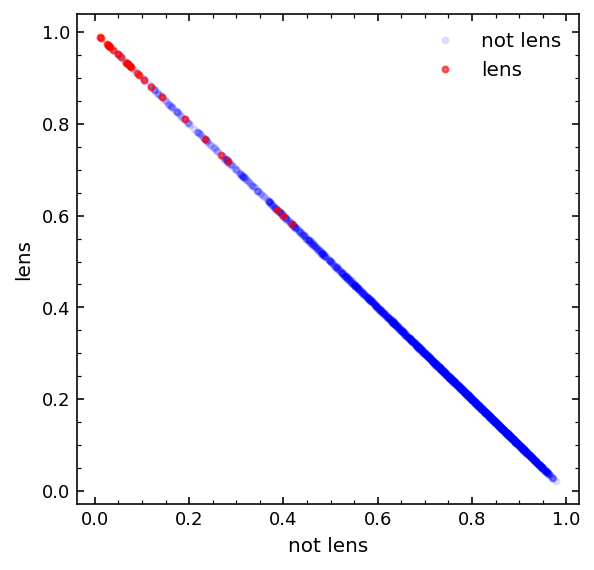

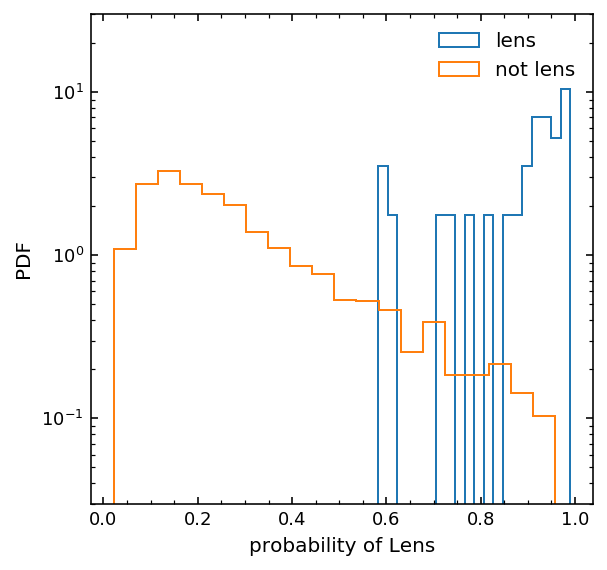

In [105]:
plt.rcParams.update(params)
bins = 20
threshold_d = 0.95
threshold_s = 0.05
bool_gt = label.copy()
bool_es = (prob[:,1]>threshold_d) * (prob[:,0]<threshold_s)
size_eval = data.shape[0]
bool_dd = bool_gt*bool_es
bool_ss = (1-bool_gt)*(1-bool_es)
bool_ds = bool_gt*(1-bool_es)
bool_sd = (1-bool_gt)*bool_es
print('| class | percentage |', '\n|-------|-------|')
print('| lens -> lens |', np.sum(bool_dd)/float(size_eval), ' | ' )# d -> d
print('| nlens-> nlens|', np.sum(bool_ss)/float(size_eval), ' | ' ) # s -> s
print('| lens -> nlens|', np.sum(bool_ds)/float(size_eval), ' | ' ) # d -> s
print('| nlens-> lens |', np.sum(bool_sd)/float(size_eval), ' | ' ) # s -> d

plt.plot(prob[bool_gt==0][:,0], prob[bool_gt==0][:,1], 'b.', label='not lens', alpha=0.1)
plt.plot(prob[bool_gt==1][:,0], prob[bool_gt==1][:,1], 'r.', label='lens', alpha=0.6)
plt.xlabel('not lens')
plt.ylabel('lens')
plt.legend()
plt.show()

plt.hist(prob[bool_gt==1][:,1], bins, density=True, histtype='step', label='lens')
plt.hist(prob[bool_gt==0][:,1], bins, density=True, histtype='step', label='not lens')
plt.xlabel('probability of Lens')
plt.ylabel('PDF')
plt.ylim([3e-2,30])
plt.yscale('log')
plt.legend()
plt.savefig('./{}.png'.format(fname[:-4]))
#plt.savefig('./{}_nolog.png'.format(fname[:-4]))
plt.show()